Import the IMDB Databaset

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(nb_words=10000)

Using MXNet backend.


In [2]:
max([max(sequence) for sequence in train_data])

9999

Vectorize the sequences

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_train = np.asarray(train_labels).astype('float32')

In [4]:
print(x_train[0], len(x_train[0]))
print(y_train[0])

[ 0.  1.  1. ...,  0.  0.  0.] 10000
1.0


Create the network

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Compile the model

In [43]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Set aside validation set

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model

In [45]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   nb_epoch=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6865 - acc: 0.5223

/home/ubuntu/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/module/bucketing_module.py:403: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001953125). Is this intended?
  force_init=force_init)


15000/15000 [==============================] - 1s - loss: 0.5722 - acc: 0.7265 - val_loss: 0.4682 - val_acc: 0.8659
Epoch 2/4
15000/15000 [==============================] - 1s - loss: 0.3800 - acc: 0.8869 - val_loss: 0.3510 - val_acc: 0.8872
Epoch 3/4
15000/15000 [==============================] - 1s - loss: 0.2719 - acc: 0.9213 - val_loss: 0.3006 - val_acc: 0.8879
Epoch 4/4
15000/15000 [==============================] - 1s - loss: 0.2003 - acc: 0.9433 - val_loss: 0.3135 - val_acc: 0.8734


Graph training and validation loss

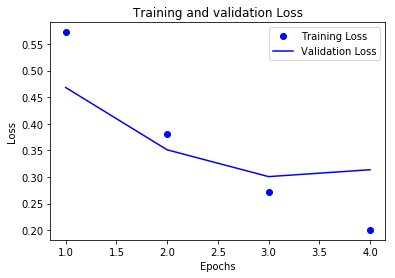

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+ 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

Graph training and validation accuracy

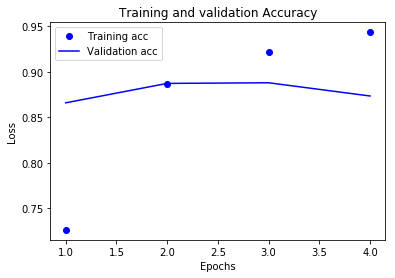

In [47]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [48]:
model.predict(x_test)

array([[ 0.83901805],
       [ 0.97526926],
       [ 0.99179572],
       ..., 
       [ 0.93607455],
       [ 0.07716891],
       [ 0.86740959]], dtype=float32)